# Ablation Experiment Results

In [13]:
from capo.analysis.utils import (
    get_results,
    # aggregate_results,
    # get_prompt_scores,
    generate_comparison_table,
)
from capo.analysis.visualizations import (
    # plot_population_scores,
    # plot_population_members,
    plot_population_scores_comparison,
    # plot_length_score,
)

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
DATASETS = ["agnews", "gsm8k"]

## No Racing

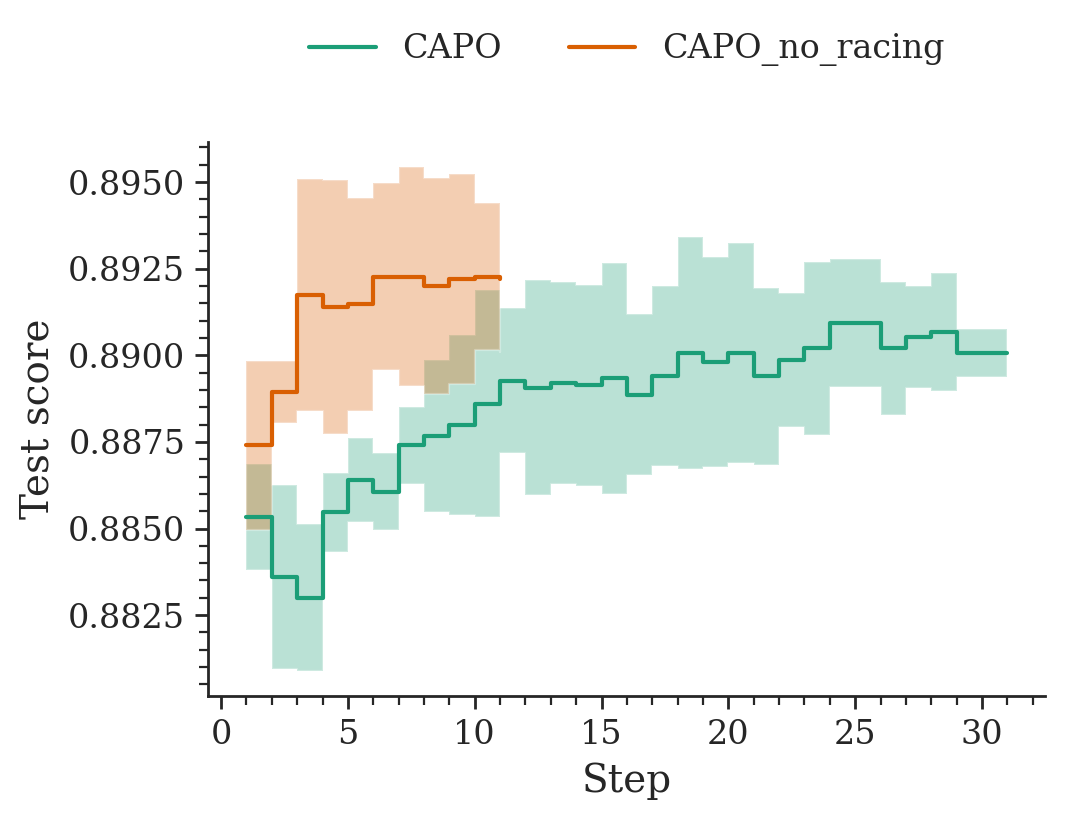

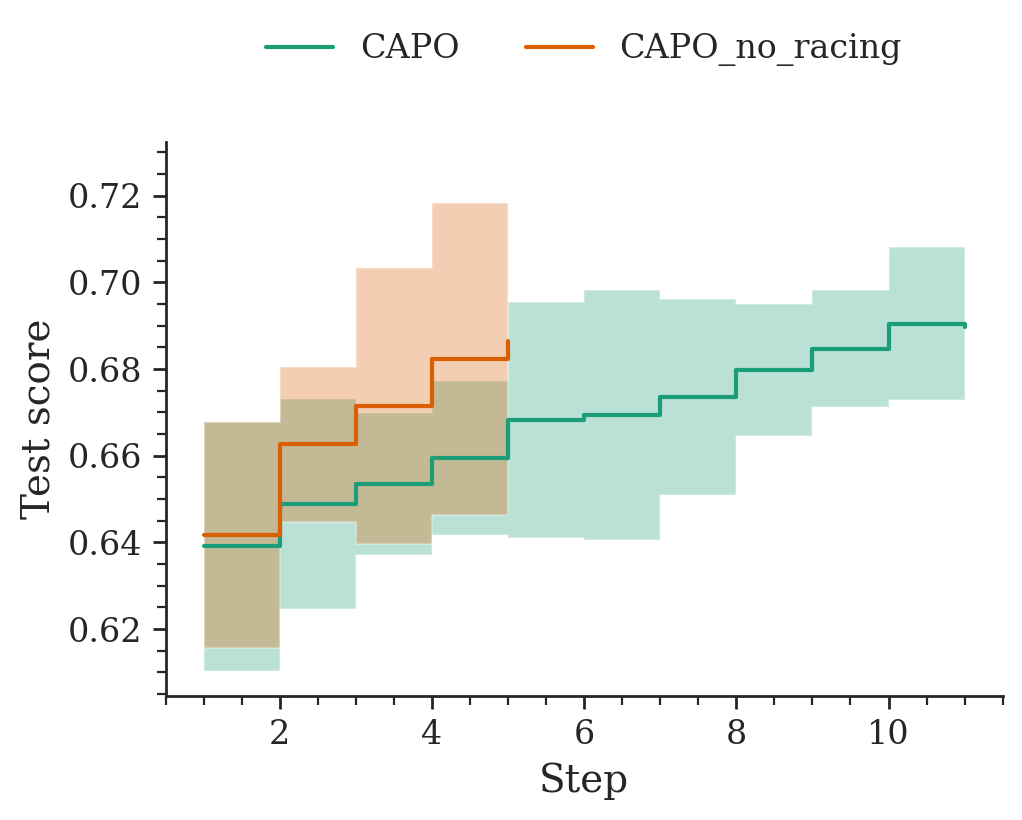

In [16]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "CAPO_no_racing"],
        path_prefix="../..",
        plot_stddev=True,
        x_col="step",
    )

- we can do much more steps if we do racing (3x for agnews/2x for gsm8k)
- in case of gsm8k we increase in performance, while for agnews we are worse than the no racing version
- performance differences lie really close to each other (within one sd)

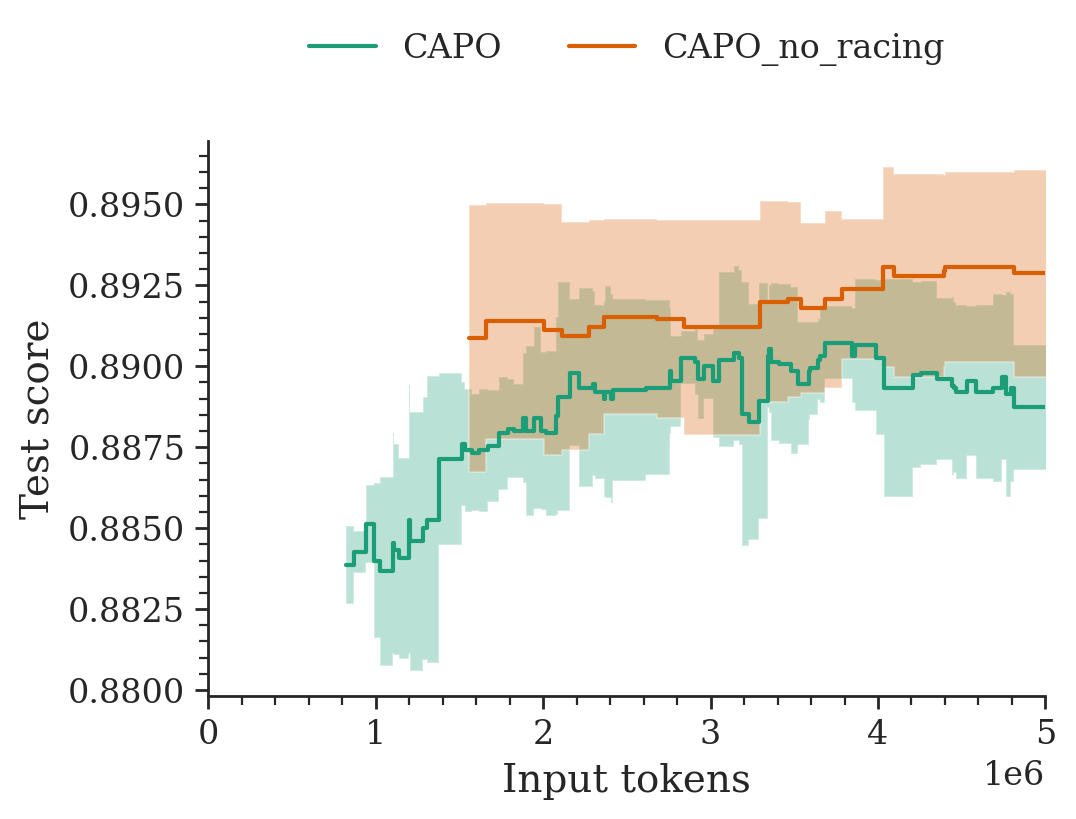

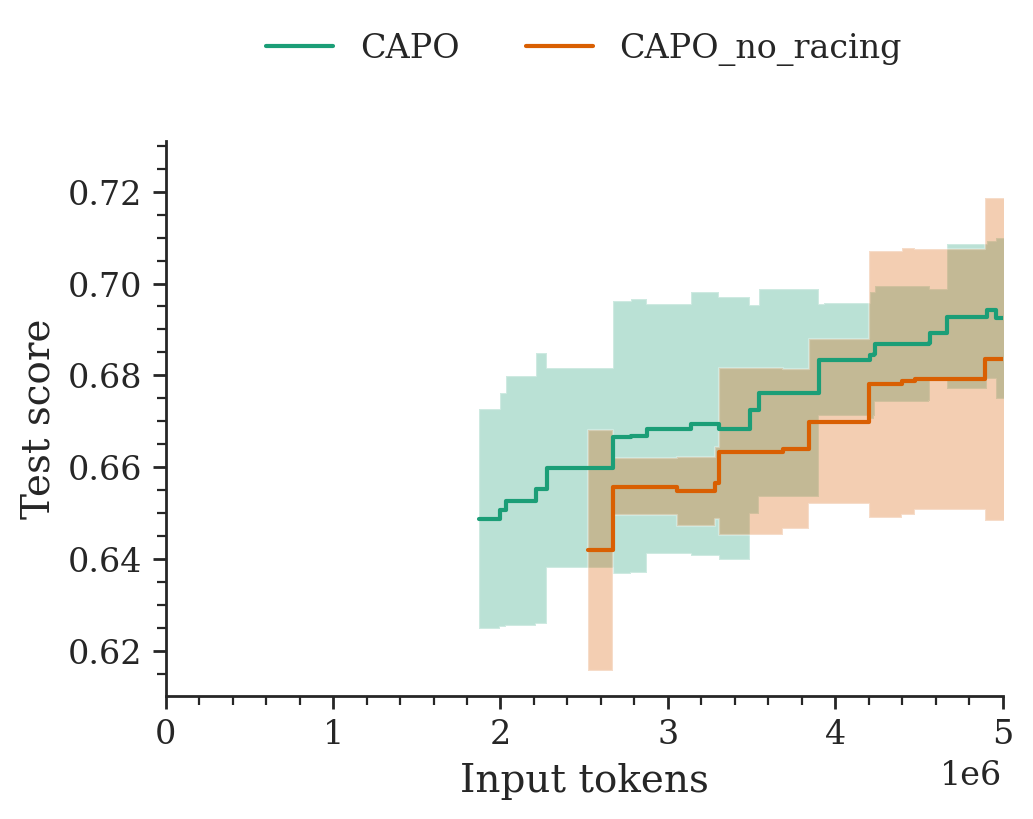

In [17]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "CAPO_no_racing"],
        path_prefix="../..",
        plot_stddev=True,
        plot_seeds=False,
        x_col="input_tokens_cum",
    )

- first results available after less tokens invested (about 500.000 tokens earlier for all seeds)
- in other seeds the results are already available much earlier (after just a couple of 100k tokens)

In [18]:
generate_comparison_table(DATASETS, ["CAPO", "CAPO_no_racing"], "llama", path_prefix="../..")

,agnews,gsm8k,avg
CAPO,88.80±0.92,73.73±4.57,81.27
CAPO_no_racing,89.20±0.53,75.00±3.82,82.10


## No Shuffling

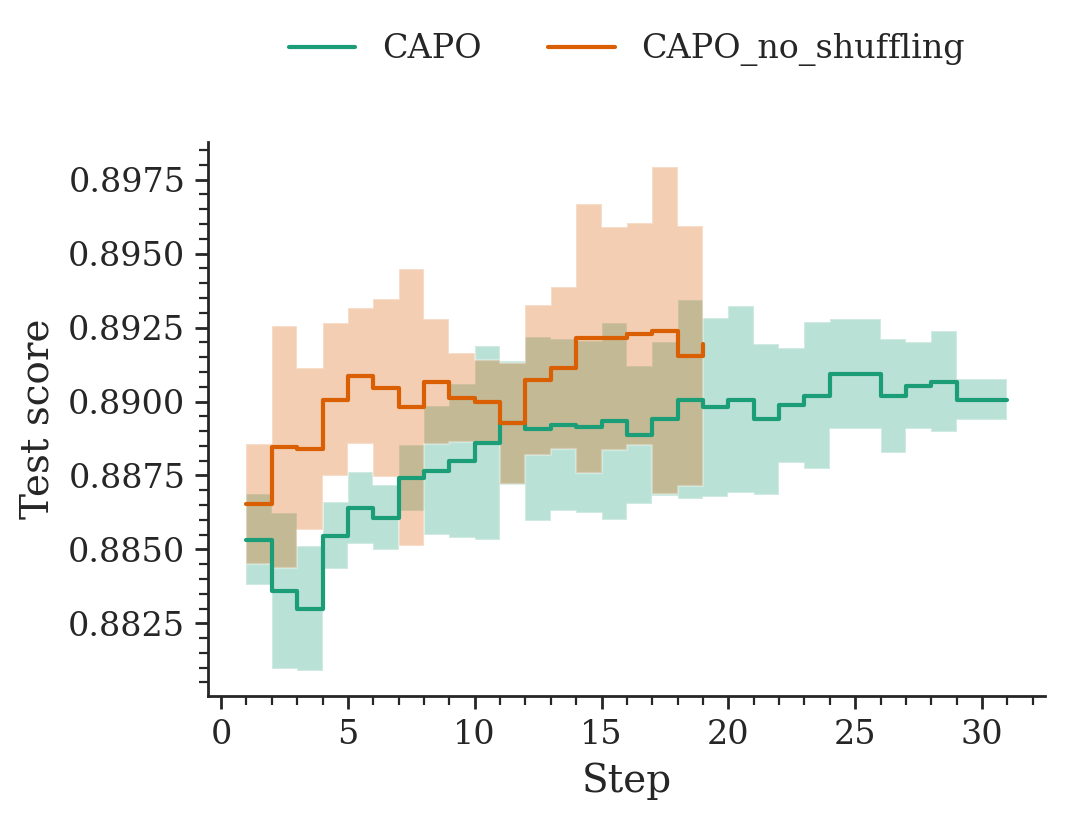

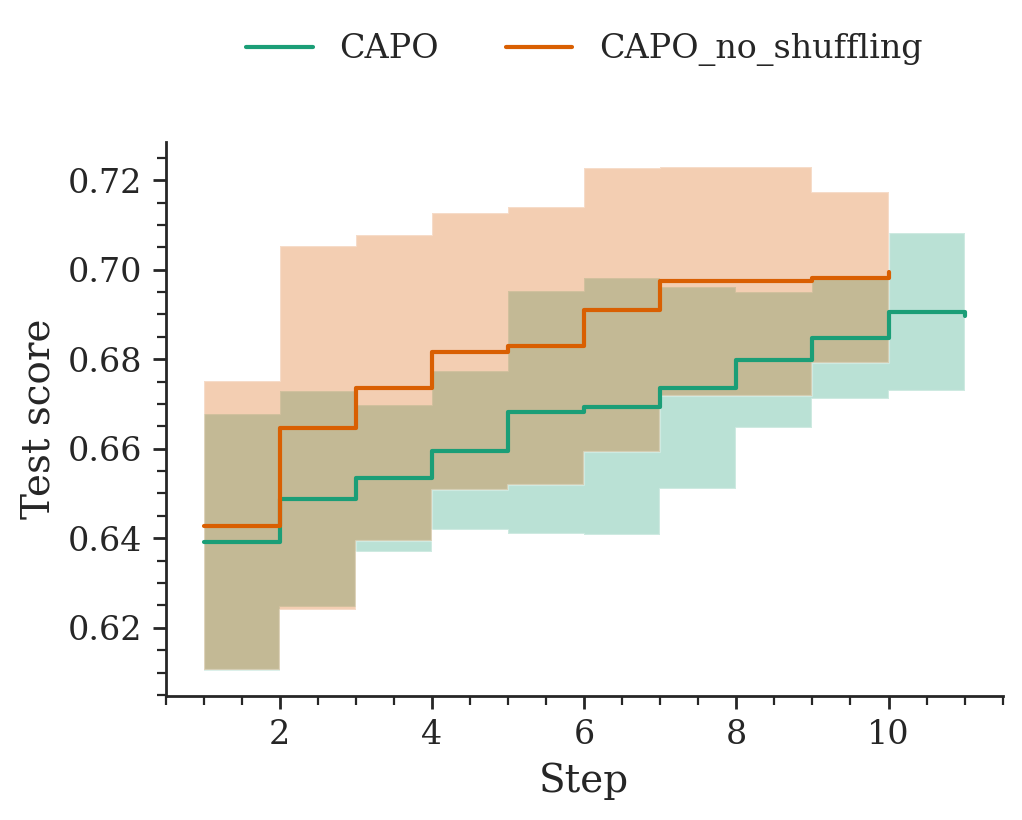

In [19]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "CAPO_no_shuffling"],
        path_prefix="../..",
        plot_stddev=True,
        x_col="step",
    )

## Zero Shot Performance

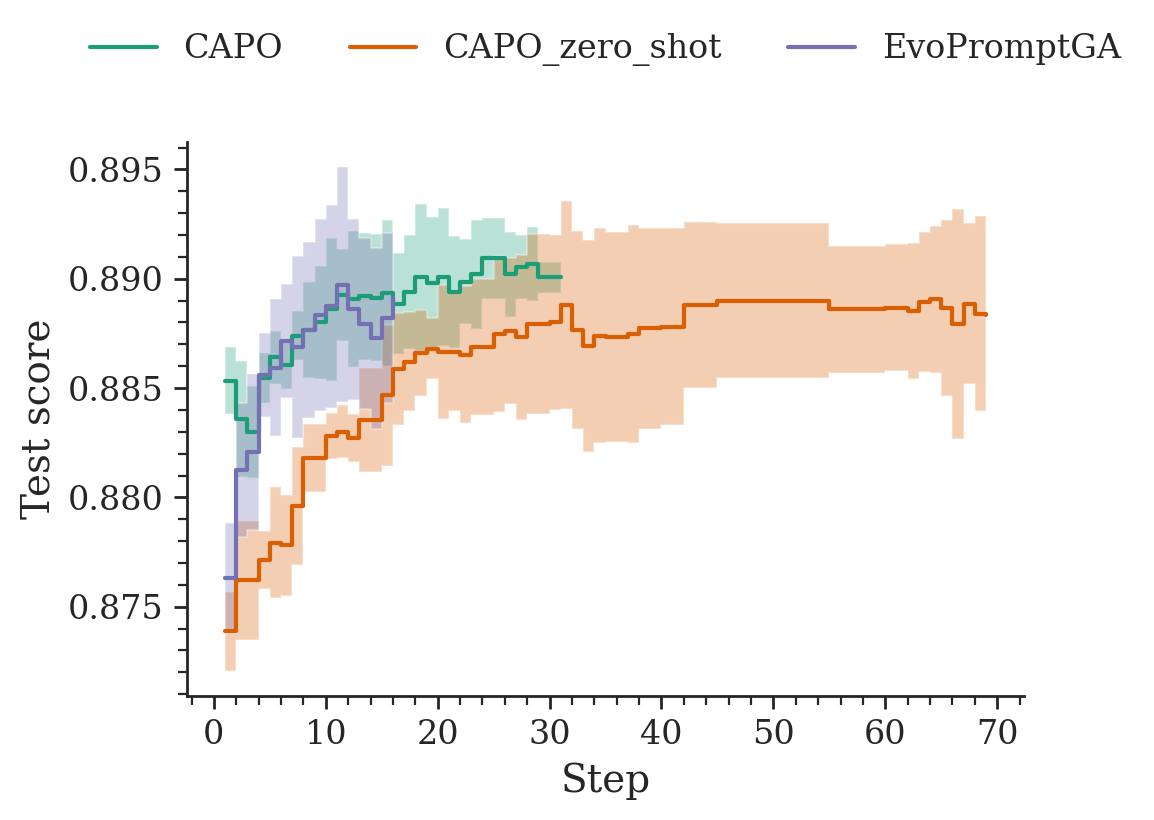

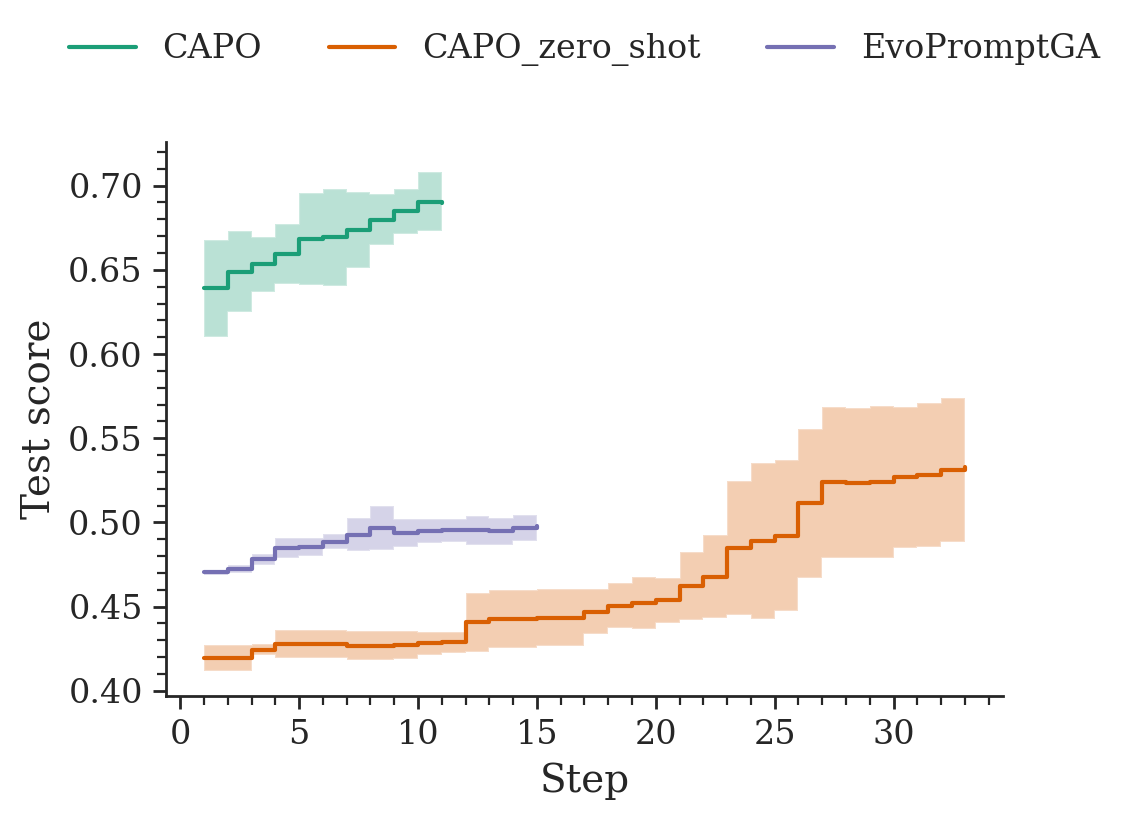

In [20]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "CAPO_zero_shot", "EvoPromptGA"],
        path_prefix="../..",
        plot_stddev=True,
        x_col="step",
    )

- we can do much more steps without few shots (less token consuming)
- for agnews we get better results in earlier steps when incorporation few-shots
- for gsm8k the shots have a great influence on the performance

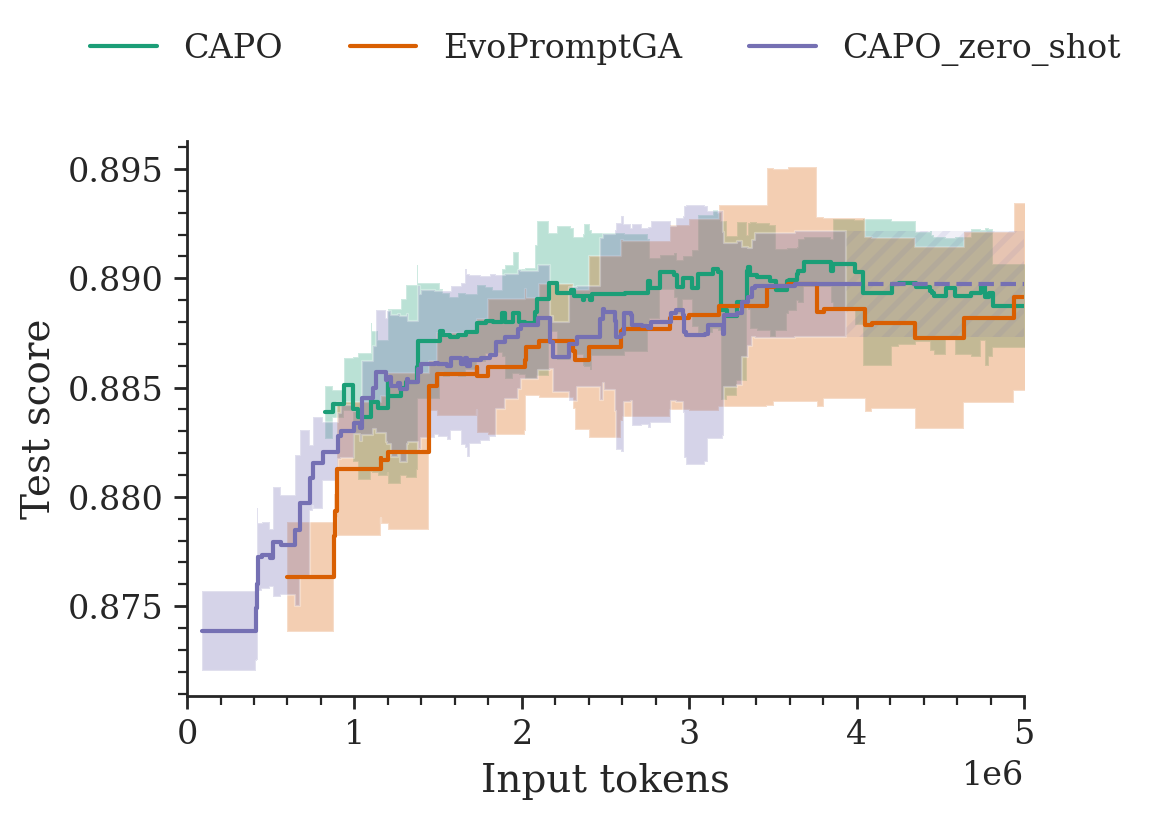

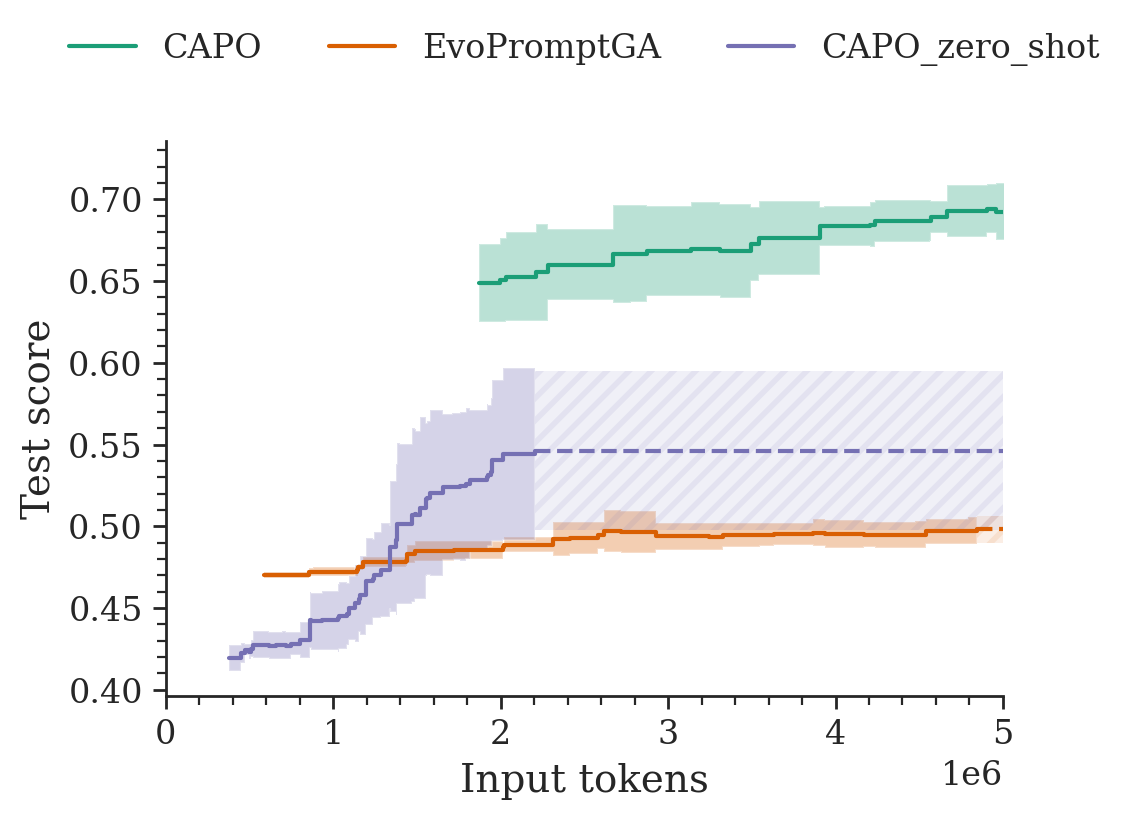

In [21]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_zero_shot"],
        path_prefix="../..",
        plot_stddev=True,
        x_col="input_tokens_cum",
    )

- higher cost efficiency without few shots (good results are early available)
- despite starting not as good as EvoPrompt we manage to take over the lead 


## Generic Initializations

In [58]:
import seaborn as sns

In [59]:
sns.color_palette("Dark2").as_hex()[3]

'#e7298a'

In [68]:
# CAPO      # EVO  # CAPO_MUT     # EVO_MUT
colors = ["#1b9e77", "#e7298a", "#8bad79", "#c179ce"]
# colors = [(27, 158, 119), (231, 41, 138), (139, 173, 121), (193, 121, 206)]

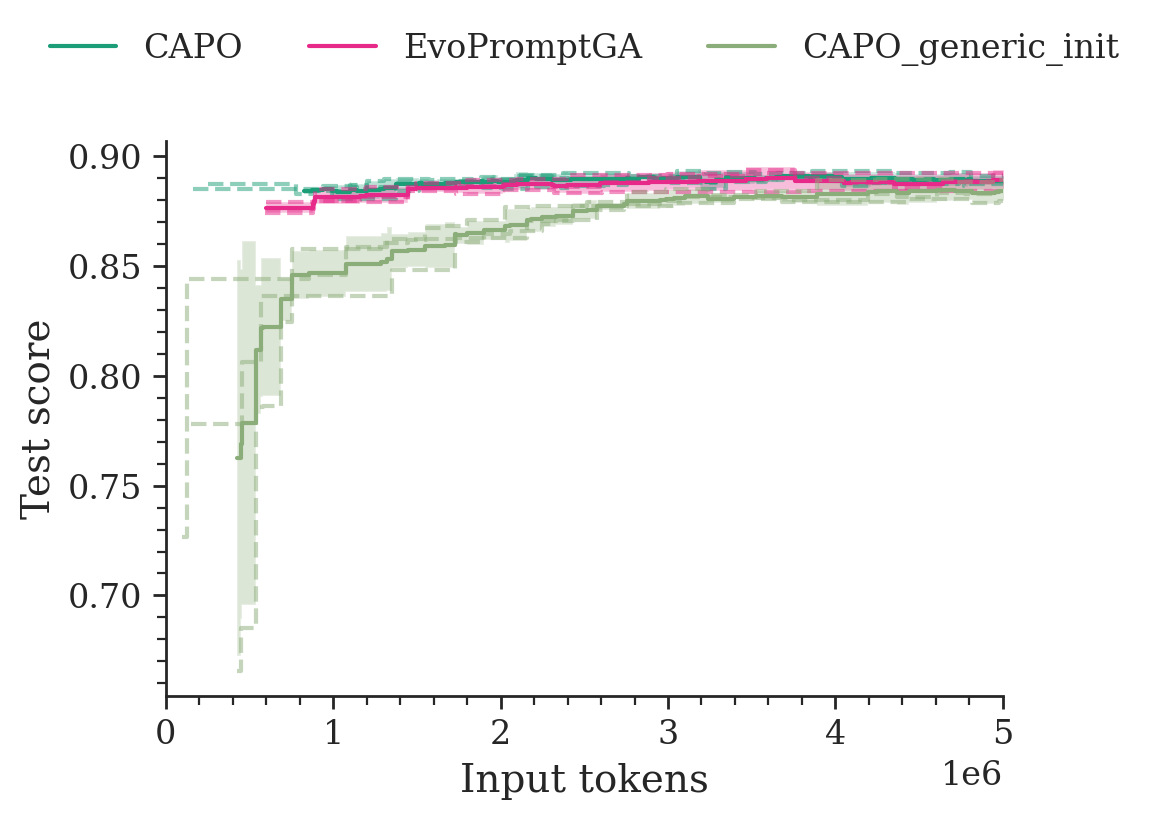

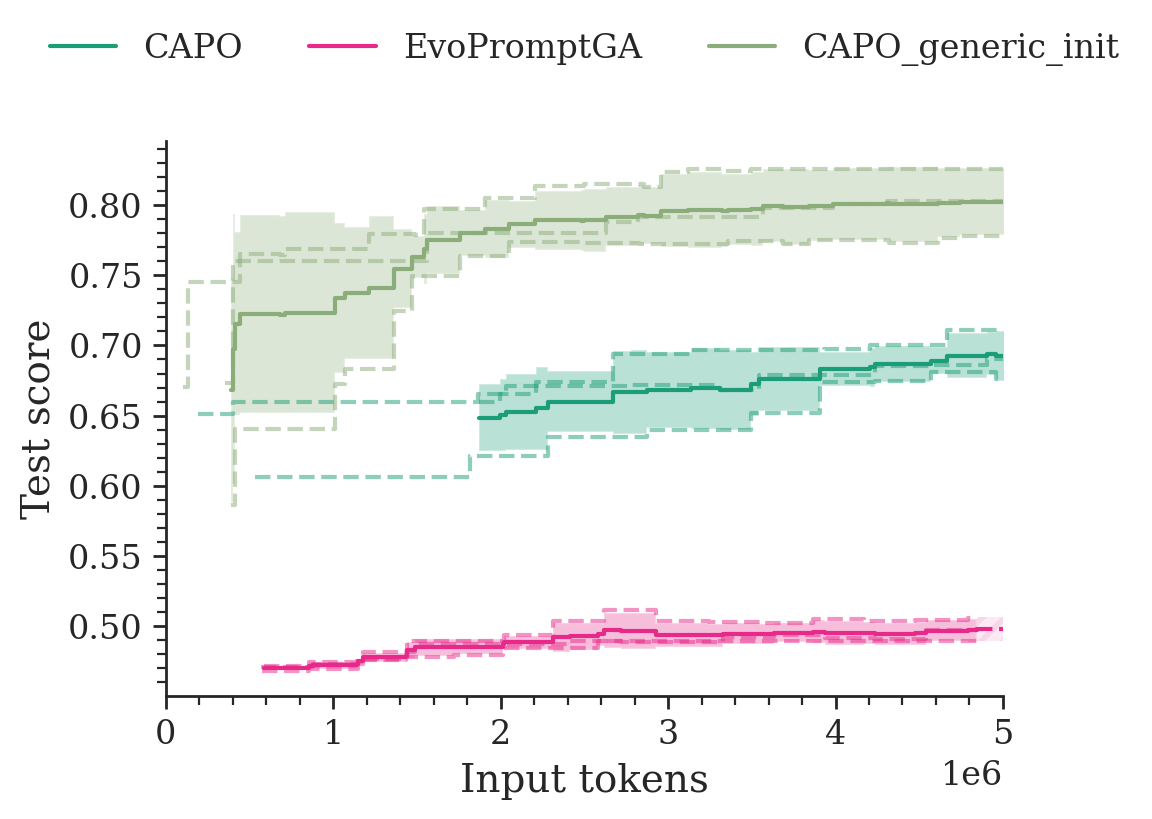

In [71]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["CAPO", "EvoPromptGA", "CAPO_generic_init"],  # "EvoPromptGA_generic_init"],
        path_prefix="../../",
        plot_stddev=True,
        plot_seeds=True,
        x_col="input_tokens_cum",
        colors=colors,
    )

In [ ]:
generate_comparison_table(
    DATASETS,
    ["CAPO", "EvoPromptGA", "EvoPromptGA_generic_init", "CAPO_generic_init"],
    "llama",
    path_prefix="../..",
)

,agnews,gsm8k,avg
CAPO,88.80±0.92,73.73±4.57,81.27
EvoPromptGA,88.67±0.50,50.87±0.90,69.77
EvoPromptGA_generic_init,23.20±0.00,53.47±0.46,38.33
CAPO_generic_init,89.33±0.23,82.93±2.89,86.13


In [72]:
generate_comparison_table(
    DATASETS,
    ["CAPO", "EvoPromptGA", "EvoPromptGA_generic_init", "CAPO_generic_init"],
    "llama",
    path_prefix="../..",
    score_col="prompt_len",
)

,agnews,gsm8k,avg
CAPO,110.33±55.81,480.67±138.28,295.50
EvoPromptGA,30.00±1.00,27.67±2.52,28.83
EvoPromptGA_generic_init,17.00±9.85,20.33±2.31,18.67
CAPO_generic_init,182.00±26.85,205.67±138.08,193.83


In [49]:
print(
    get_results("agnews", "llama", "EvoPromptGA_generic_init", path_prefix="../../")
    .groupby("prompt", as_index=False)
    .first()
    .sort_values("test_score", ascending=False)
    .iloc[1]["prompt"]
)  # .item())

Thoroughly examine the query, provide a thoughtful perspective, and formulate a detailed response, ensuring the answer is enclosed within <final_answer> tags for easy identification, systematic review, and further processing.


## EvoPrompt Simplified Template

Failed to load agnews for nan: No objects to concatenate
Failed to load agnews for nan: No objects to concatenate
Failed to load gsm8k for nan: No objects to concatenate
Failed to load gsm8k for nan: No objects to concatenate


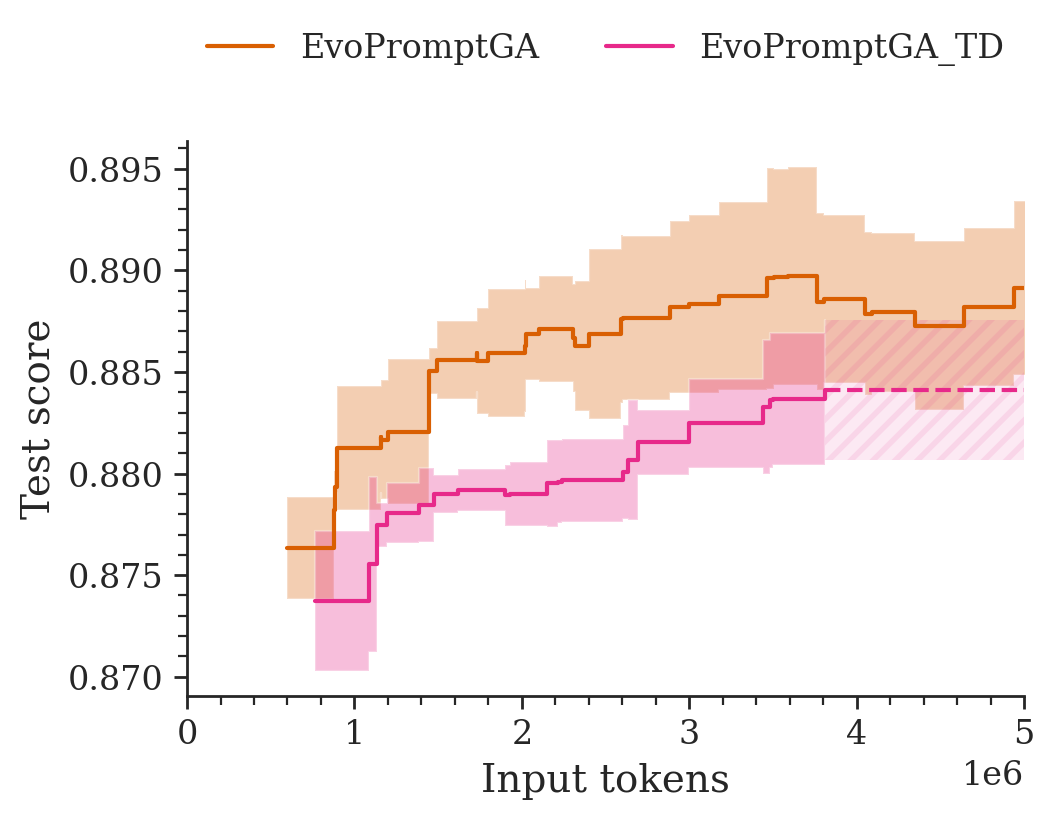

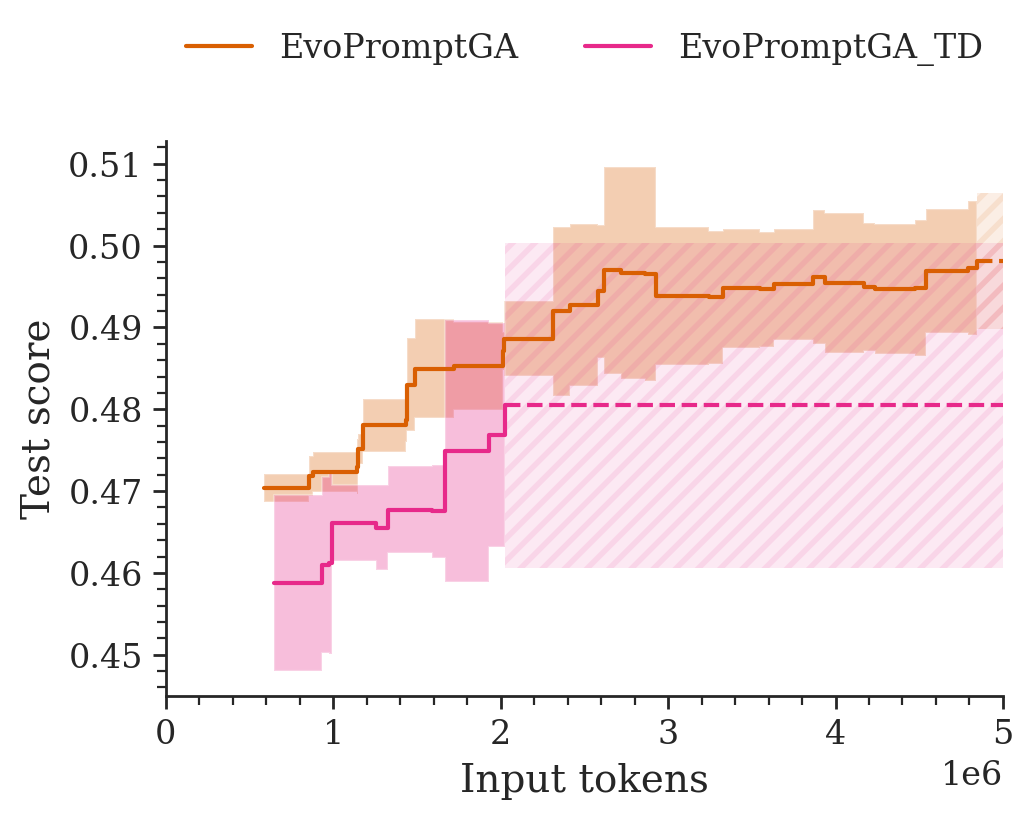

In [70]:
for dataset in DATASETS:
    plot_population_scores_comparison(
        dataset,
        "llama",
        ["nan", "EvoPromptGA", "nan", "EvoPromptGA_TD"],
        path_prefix="../..",
        plot_stddev=True,
        x_col="input_tokens_cum",
    )

- using our simplified template (which also incorporates a task description) we perform slightly worse than the vanilla EvoPromptGA
- lets move this in the appendix